# Creating testing data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import jupyter_black
import plotly.express as px
from plotly.subplots import make_subplots

jupyter_black.load()

In [13]:
"""Creating a test dataset with a lot of mixed variable types and wierd column names to help build our functions."""

norm_0_1 = pd.DataFrame(
    np.random.normal(0, 1, size=(1000, 1)), columns=["Norm"]
)  # Creating contineuos data, column A is normally distributed.

norm_10_20 = pd.DataFrame(
    np.random.normal(10, 20, size=(1000, 1)), columns=[46718]  ## random number name
)  # Creating contineuos data, column 1 is normally distributed.

expo_5 = pd.DataFrame(
    np.random.exponential(5, size=(1000, 1)), columns=["Expo"]
)  # Column B is exponentially distributed.

random_float = pd.DataFrame(
    np.random.rand(1000, 1) * 10, columns=["Random_float"]
)  # Column C is random data.

discrete = pd.DataFrame(
    np.random.randint(0, 50, size=(1000, 1)), columns=["random_discrete"]
)  # Column D is random but discrete data.

categorical = pd.DataFrame(
    np.random.choice(["a", "b", "c", "d"], size=(1000, 1)), columns=["categorical"]
)  # Column E is categorical data.

categorical_2 = pd.DataFrame(
    np.random.choice(["v", "y", "z", "w"], size=(1000, 1)),
    columns=[32134],  ## random number name
)  # Column 2 is categorical data.

df = pd.concat(
    (norm_0_1, norm_10_20, expo_5, random_float, discrete, categorical, categorical_2),
    axis=1,
)
df.index.name = "ID"  # We set the index name to ID because it is a general name for the index of a dataset.

np.random.seed(42)  # We set the seed to 42 so that we can reproduce the results.
for c in range(len(df.columns)):
    df.iloc[
        [x for x in range(1, 999) if ((x % np.random.randint(1, 100) == 0))], c
    ] = np.nan
df.head()

,Norm,46718,Expo,Random_float,random_discrete,categorical,32134
ID,,,,,,,
0,0.205630,-2.233993,0.396853,2.135673,33.0,b,y
1,-1.034137,-48.723241,6.596922,0.106723,3.0,d,w
2,-0.889352,-7.709818,NaN,7.765575,37.0,b,w
3,1.378284,13.237764,0.014580,8.216493,6.0,c,w
4,-0.362757,23.772161,0.047323,NaN,47.0,a,w


In [14]:
## Creating a multi-indexed dataframe
second_idx = pd.Series([x for x in range(1, 1001)])
df_multi_idx = df.copy()
df_multi_idx["2nd ID"] = second_idx
df_multi_idx.set_index(["2nd ID"], append=True, inplace=True)
df_multi_idx.head()

,,Norm,46718,Expo,Random_float,random_discrete,categorical,32134
ID,2nd ID,,,,,,,
0,1,0.205630,-2.233993,0.396853,2.135673,33.0,b,y
1,2,-1.034137,-48.723241,6.596922,0.106723,3.0,d,w
2,3,-0.889352,-7.709818,NaN,7.765575,37.0,b,w
3,4,1.378284,13.237764,0.014580,8.216493,6.0,c,w
4,5,-0.362757,23.772161,0.047323,NaN,47.0,a,w


In [15]:
# Creating the csv and xlsx files
df.to_csv("example_original.csv")
df.to_excel("example_original.xlsx")

# df_multi_idx.to_csv("imputation_example_multi_idx.csv")
# df_multi_idx.to_excel("imputation_example_multi_idx.xlsx")

In [24]:
hist = px.histogram(data_frame=df, x="Norm")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

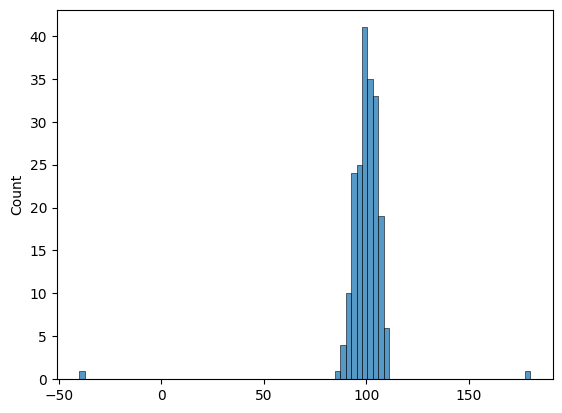

In [14]:
mu, sigma = 100, 5
array = np.random.normal(mu, sigma, 200)
array

array[90] = 180
array[50] = -40

sns.histplot(array)
plt.show()

In [39]:
df = pd.DataFrame(array, columns=["Data"])
df.head()

,Data
0,101.217421
1,104.662502
2,100.726405
3,94.051752
4,89.389040
